# Plot B field contour diagram near a transmitter winding

## Generate wire define file


In [2]:
num_turns = 5
radius = 1
pitch = 2e-1
file_out_def = open("wire_def", "w")
file_out_def.write("1\r\n0.0005 2\r\ns " + str(num_turns) + "\r\n")
for i in range(num_turns):
    file_out_def.write(str(radius-i*pitch) +" 0 0\r\n")
file_out_def.write("i 1 0\r\n")
file_out_def.close()

file_out_obs = open("obs_def", "w")
x_min = -1.2
x_max = 1.2
x_num = 13
y_min = 0
y_max = 0
y_num = 1
z_min = -0.2
z_max = 2.2
z_num = 13
file_out_obs.write(str(x_min) + " " + str(x_max) + " " + str(x_num) + "\r\n")
file_out_obs.write(str(y_min) + " " + str(y_max) + " " + str(y_num) + "\r\n")
file_out_obs.write(str(z_min) + " " + str(z_max) + " " + str(z_num) + "\r\n")
file_out_obs.close()

# execute the command
import os
os.system("../../../build/ivsolver wire_def wires -b obs_def")


0

# Plot wire frame

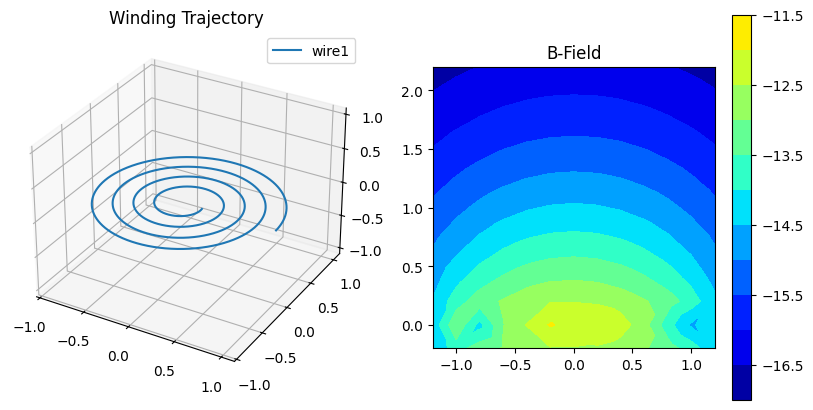

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def set_axes_equal(ax):
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    """

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])
    
    
figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot(1,2,1,projection='3d')

coords = np.hsplit(np.loadtxt('wires_0.trj'), 3)
x = np.squeeze(np.asarray(coords[0]))
y = np.squeeze(np.asarray(coords[1]))
z = np.squeeze(np.asarray(coords[2]))

ax.plot3D(x, y, z, label='wire1')
set_axes_equal(ax)
ax.legend()
ax.title.set_text('Winding Trajectory')

data = np.hsplit(np.loadtxt('wires.obs'), 9)
x = np.squeeze(np.asarray(data[0]))
y = np.squeeze(np.asarray(data[1]))
z = np.squeeze(np.asarray(data[2]))
vx_real = np.squeeze(np.asarray(data[3]))
vx_imag = np.squeeze(np.asarray(data[4]))
vy_real = np.squeeze(np.asarray(data[5]))
vy_imag = np.squeeze(np.asarray(data[6]))
vz_real = np.squeeze(np.asarray(data[7]))
vz_imag = np.squeeze(np.asarray(data[8]))
val = np.log(np.sqrt(vx_real**2 + vx_imag**2 + vy_real**2 + vy_imag**2 + vz_real**2 + vz_imag**2))

ax = figure.add_subplot(1,2,2)
ax.title.set_text('B-Field')
ax.set_aspect('equal')
cbar = plt.colorbar(ax.tricontourf(x, z, val, levels=10, cmap='jet', vmin=-17, vmax=-9))
#plt.show()
#save the plot to a file as png
figure.savefig('winding.png', dpi=300)
